<a href="https://colab.research.google.com/github/Priya-4233/AICTE_Internship-Projects/blob/main/ObjectDetect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Download Dataset from Roboflow**

****Important Note**

This dataset has already been trained on a YOLOv8 model within the Roboflow platform. Running the code will automatically download this preprocessed dataset to your system.

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="xfIxeQwRsgLDlPTP9vWs")
project = rf.workspace("himaprog").project("detect-count-and-visualize-object-detection-bximr-1djfo")
version = project.version(1)
dataset = version.download("yolov8-obb")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.9/86.9 kB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 58.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 52.8 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.12.0.88
    Uninstalling opencv-python-headless-4.12.0.88:
      Successfully uninstalled opencv-python-headless-4.12.0.88
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Detect,-Count,-And-Visualize-Object-Detection-1 in yolov8-obb:: 100%|██████████| 226/226 [00:00<00:00, 6419.04it/s]


***Installing Ultralytics Library ***

In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 42.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 38.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 40.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 765.3 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 46.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling 

**Load Pre-trained YOLOv8 Model**

This model is the core component for performing object detection on images.
It has been pre-trained on a large dataset.

In [ ]:
from ultralytics import YOLO

# Load a pre-trained YOLOv8 model
model = YOLO('yolov8n.pt')

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 6.25M/6.25M [00:00<00:00, 16.8MB/s]


**Identifying Training Image Path**

In [ ]:
# The 'dataset' variable holds the downloaded dataset object from Roboflow
# Access the location attribute to get the path to the dataset directory
dataset_path = dataset.location

# Construct the path to the training images
# The structure is typically <dataset_location>/train/images
train_image_path = f"{dataset_path}/train/images"

print(f"Path to training images: {train_image_path}")


Path to training images: /content/Detect,-Count,-And-Visualize-Object-Detection-1/train/images


**Perform Object Detection on Input Images**

****Important Note**

After downloading the images from browser, you need to upload them to your Google Colab environment. Then, provide the file paths of these uploaded images when prompted by the code. If the file paths are incorrect or the images are not uploaded, the code will display a "file not found" error. You will be asked to provide paths for three input images.

**Visualize Object Detection Results:**

This code displays the images for which you provided paths in the "Perform Object Detection" step.
On these images, the model's predictions are visualized.
Detected objects are indicated by square boxes drawn around them.
Each detected object is also labeled with its predicted name within the image.

Please enter the path to the first image you want to analyze: /content/Webinar-Collaborate-Project-Gateway-1200x400.webp
Please enter the path to the second image you want to analyze: /content/OIP.webp
Input path 1 received: /content/Webinar-Collaborate-Project-Gateway-1200x400.webp
Input path 2 received: /content/OIP.webp

0: 640x640 5 persons, 1 tie, 1 cup, 2 potted plants, 1 dining table, 1 clock, 1 vase, 423.4ms
1: 640x640 5 persons, 1 cup, 1 dining table, 1 refrigerator, 1 clock, 423.4ms
Speed: 30.0ms preprocess, 423.4ms inference, 19.9ms postprocess per image at shape (1, 3, 640, 640)


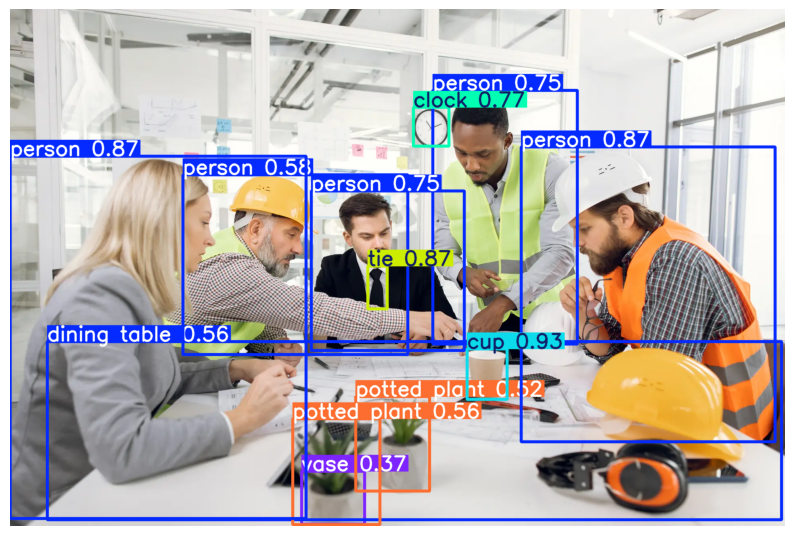

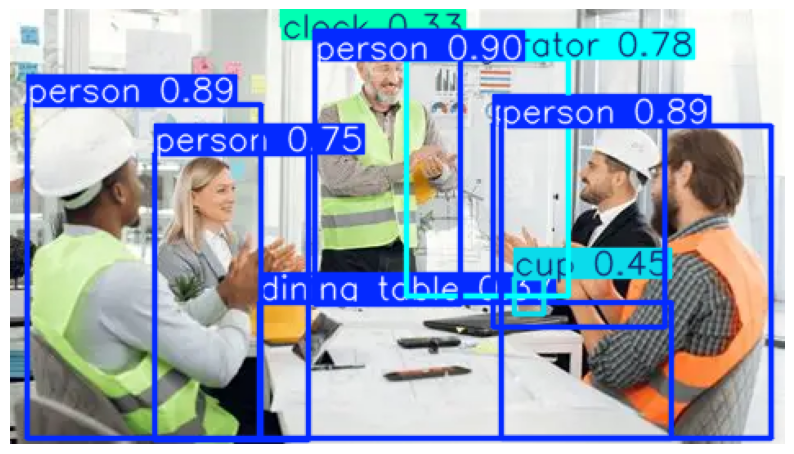

In [ ]:
# Ask the user for the paths to the input images
input_image_path1 = input("Please enter the path to the first image you want to analyze: ")
input_image_path2 = input("Please enter the path to the second image you want to analyze: ")

# Print the input paths to verify
print(f"Input path 1 received: {input_image_path1}")
print(f"Input path 2 received: {input_image_path2}")

# Perform object detection on the input images
results = model.predict([input_image_path1, input_image_path2])


import matplotlib.pyplot as plt
import cv2

for result in results:
    # The annotated image is stored in the 'plot()' method's output
    annotated_image = result.plot()

    # Convert the annotated image from BGR (default by OpenCV) to RGB for matplotlib
    annotated_image_rgb = cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB)

    # Display the annotated image
    plt.figure(figsize=(10, 10))
    plt.imshow(annotated_image_rgb)
    plt.axis('off')
    plt.show()

**Analyze and Visualize Confidence Scores**

This visualization helps you see how often the model is highly confident in its detections versus when it's less certain.

Additionally, the code calculates and prints the minimum, maximum, and average confidence scores to provide a statistical summary of the detection confidence.

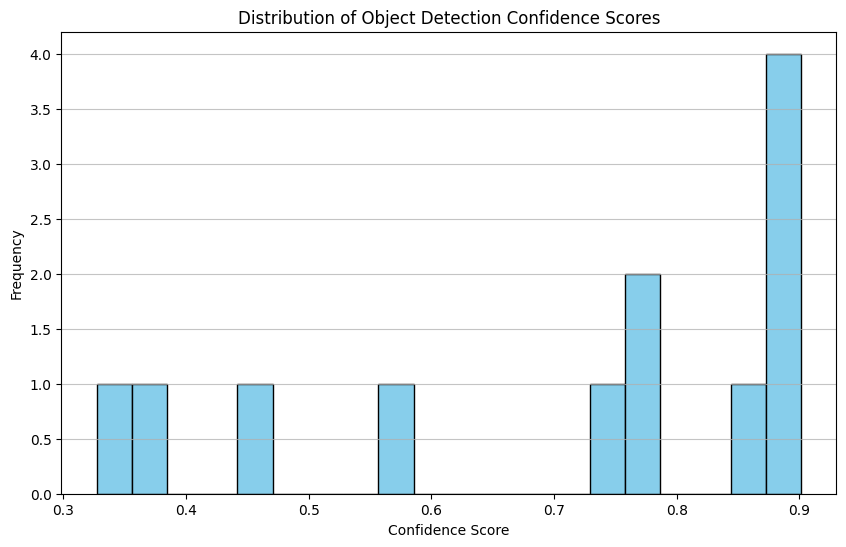

Minimum confidence score: 0.3270
Maximum confidence score: 0.9014
Average confidence score: 0.7027


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

confidence_scores = []

# Iterate through the results for each image
for result in results:
    # Iterate through each detection in the result
    for box in result.boxes:
        # Append the confidence score to the list
        confidence_scores.append(box.conf.item())

# Plot a histogram of the confidence scores
plt.figure(figsize=(10, 6))
plt.hist(confidence_scores, bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Object Detection Confidence Scores')
plt.xlabel('Confidence Score')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

# You can also print some statistics about the confidence scores
print(f"Minimum confidence score: {np.min(confidence_scores):.4f}")
print(f"Maximum confidence score: {np.max(confidence_scores):.4f}")
print(f"Average confidence score: {np.mean(confidence_scores):.4f}")

In [ ]:
# The model.val() method requires the path to the data.yaml file
# This file is typically located in the dataset directory downloaded from Roboflow
# Assuming the data.yaml is in the dataset_path obtained earlier:
data_yaml_path = f"{dataset_path}/data.yaml"

# Evaluate the model on the dataset
metrics = model.val(data=data_yaml_path)

# Print the evaluation metrics
print("Evaluation Metrics:")
print(f"  Precision: {metrics.results_dict['metrics/precision(B)']:.4f}")
print(f"  Recall: {metrics.results_dict['metrics/recall(B)']:.4f}")
print(f"  mAP@0.5: {metrics.results_dict['metrics/mAP50(B)']:.4f}")
print(f"  mAP@0.5:0.95: {metrics.results_dict['metrics/mAP50-95(B)']:.4f}")

Ultralytics 8.3.168 🚀 Python-3.11.13 torch-2.6.0+cu124 CPU (AMD EPYC 7B12)


100%|██████████| 755k/755k [00:00<00:00, 24.2MB/s]

val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 994.5±320.9 MB/s, size: 62.9 KB)



val: Scanning /content/Detect,-Count,-And-Visualize-Object-Detection-1/valid/labels... 21 images, 0 backgrounds, 0 corrupt: 100%|██████████| 21/21 [00:00<00:00, 1977.20it/s]

val: New cache created: /content/Detect,-Count,-And-Visualize-Object-Detection-1/valid/labels.cache



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:06<00:00,  3.05s/it]


                   all         21         68    0.00766     0.0566      0.018     0.0152
                person         10         18          0          0          0          0
               bicycle          5          5          0          0          0          0
                   car          8         16     0.0103      0.125    0.00635    0.00292
            motorcycle          9         10          0          0          0          0
              airplane         17         19      0.028      0.158     0.0836     0.0731
Speed: 18.2ms preprocess, 264.4ms inference, 0.0ms loss, 1.4ms postprocess per image
Results saved to runs/detect/val
Evaluation Metrics:
  Precision: 0.0077
  Recall: 0.0566
  mAP@0.5: 0.0180
  mAP@0.5:0.95: 0.0152
